In [ ]:
# Characterisation can be done by changing settings to qibolab/runcards/tiiq.yml and examples/tii/diagnostics.yml
# These scripts do not save the characterisation results to the runcard; to do so use save_config_parameter:
#   ds.backup_config_file()
#   resonator_freq, avg_min_voltage, max_ro_voltage, smooth_dataset, dataset = ds.run_resonator_spectroscopy()
#   ds.save_config_parameter('resonator_freq', resonator_freq, 'characterization', 'single_qubit', qubit)

In [1]:
from qibolab.paths import script_folder
from qibolab import Platform
from qibolab.calibration import utils
from qibolab.calibration.calibration import Calibration as Diagnostics

diagnostics_settings = script_folder / "diagnostics.yml"

# Create a platform; connect and configure it
platform = Platform('tiiq')
platform.connect()
platform.setup()

# create a diagnostics/calibration object
ds = Diagnostics(platform, diagnostics_settings)

# select the qubit to be characterised
qubit = 0


[Qibo 0.1.8.dev2|INFO|2022-07-20 16:59:47]: Loading platform tiiq from runcard d:\alvaro\projects\github\qibolab\src\qibolab\runcards\tiiq.yml
[Qibo 0.1.8.dev2|INFO|2022-07-20 16:59:47]: Connecting to tiiq instrument qrm_rf.
[Qibo 0.1.8.dev2|INFO|2022-07-20 16:59:49]: Connecting to tiiq instrument qcm_rf1.
[Qibo 0.1.8.dev2|INFO|2022-07-20 16:59:53]: Creating MeasurementControl Calibration


In [ ]:
ds.backup_config_file()

Resonator Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     28s | time left:      0s  
100% completed | elapsed time:     28s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     21s | time left:      0s  
100% completed | elapsed time:     21s | time left:      0s  

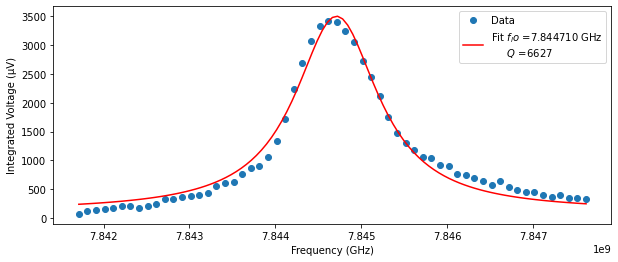


Resonator Frequency = 7864710404


In [2]:
resonator_freq, avg_voltage, peak_voltage, dataset = ds.run_resonator_spectroscopy(qubit)

In [5]:
int(peak_voltage*1e6)

3384

In [ ]:
ds.save_config_parameter("resonator_freq", resonator_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("resonator_spectroscopy_avg_ro_voltage", int(avg_voltage), 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("resonator_spectroscopy_peak_ro_voltage", int(peak_voltage), 'characterization', 'single_qubit', qubit)
lo_qrm_frequency = int(resonator_freq - platform.settings['native_gates']['single_qubit'][qubit]['MZ']['frequency'])
ds.save_config_parameter("out0_in0_lo_freq", lo_qrm_frequency, 'instruments', platform.qrm[qubit].name, 'settings')

Resonator Punchout

In [6]:
dataset = ds.run_resonator_punchout(qubit)

Starting iterative measurement...
100% completed | elapsed time:    212s | time left:      0s  
100% completed | elapsed time:    212s | time left:      0s  

Resonator Spectroscopy Flux

In [ ]:
dataset = ds.run_resonator_punchout(qubit, fluxline = 0)

Qubit Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     12s | time left:      0s  
100% completed | elapsed time:     12s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     11s | time left:      0s  
100% completed | elapsed time:     11s | time left:      0s  

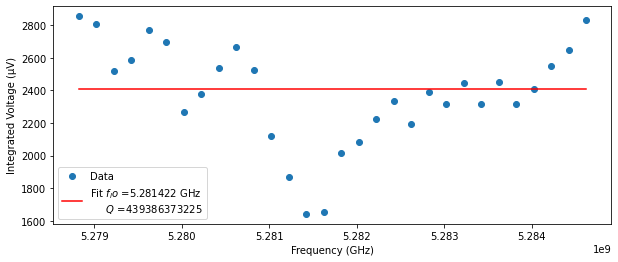


Qubit Frequency = 5081421756


In [7]:
qubit_freq, avg_voltage, peak_voltage, dataset = ds.run_qubit_spectroscopy(qubit)

In [ ]:
ds.save_config_parameter("qubit_freq", qubit_freq, 'characterization', 'single_qubit', qubit)
lo_qcm_frequency = int(qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
ds.save_config_parameter("qubit_spectroscopy_peak_ro_voltage", float(peak_voltage), 'characterization', 'single_qubit', qubit)

Rabi Oscillations with varying pulse length

Starting iterative measurement...
100% completed | elapsed time:    156s | time left:      0s  
100% completed | elapsed time:    156s | time left:      0s  
Pi pulse duration = 19

Pi pulse amplitude = 0.9

rabi oscillation peak voltage = 930


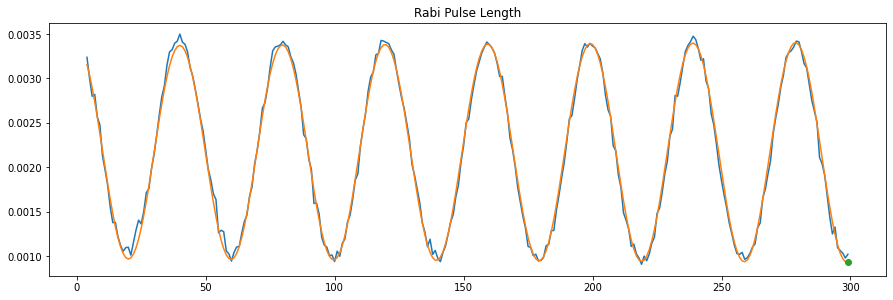

In [8]:
pi_pulse_duration, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_ro_voltage, dataset = ds.run_rabi_pulse_length(qubit)

In [ ]:
ds.save_config_parameter("duration", int(pi_pulse_duration), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("amplitude", float(pi_pulse_amplitude), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("rabi_oscillations_pi_pulse_peak_ro_voltage", float(rabi_oscillations_pi_pulse_peak_ro_voltage), 'characterization', 'single_qubit', qubit)

T1

Starting iterative measurement...
100% completed | elapsed time:     49s | time left:      0s  
100% completed | elapsed time:     49s | time left:      0s  
T1 = 12087


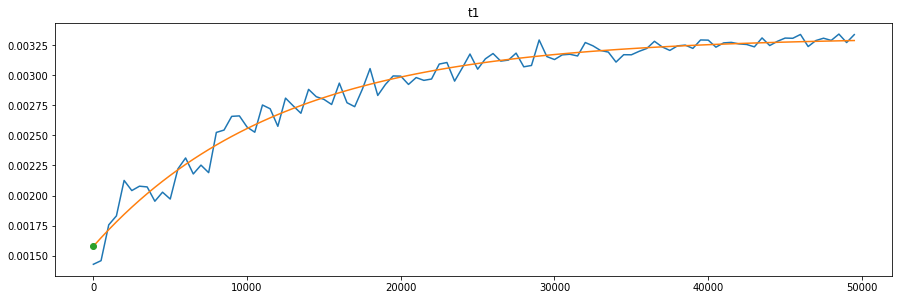

In [3]:
t1, dataset = ds.run_t1(qubit)

In [ ]:
ds.save_config_parameter("T1", float(t1), 'characterization', 'single_qubit', qubit)

Ramsey

In [ ]:
delta_frequency, t2, smooth_dataset, dataset = ds.run_ramsey(qubit)

In [ ]:
adjusted_qubit_freq = int(platform.settings['characterization']['single_qubit'][qubit]['qubit_freq'] + delta_frequency)
ds.save_config_parameter("qubit_freq", adjusted_qubit_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("T2", float(t2), 'characterization', 'single_qubit', qubit)
RX_pulse_sequence = platform.settings['native_gates']['single_qubit'][qubit]['RX']['pulse_sequence']
lo_qcm_frequency = int(adjusted_qubit_freq + RX_pulse_sequence[0]['frequency'])
ds.save_config_parameter("frequency", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
print(adjusted_qubit_freq)

In [ ]:
# import yaml
# with open(qibolab_folder / "ramsey_data.yml" , "w") as file:
#     settings = yaml.dump(dataset['y0'].values.tolist(), file, sort_keys=False, indent=4)
#     file.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pathlib
import yaml
import os

# script_folder = pathlib.Path(os.path.abspath(''))
# with open(script_folder / "ramsey_data.yml" , "r") as file:
#     ramsey_samples = yaml.safe_load(file)
#     file.close()

ramsey_samples = [a + 1j * b for (a, b) in zip(dataset['y2'].values.tolist(), dataset['y3'].values.tolist())]

# How many time points are needed i,e., Sampling Frequency
samplingFrequency = 1e3 # samples / microsecond

# At what intervals time points are sampled
samplingInterval = 1 / samplingFrequency # microseconds

# Begin time period of the signals
beginTime = 4e-3 # microseconds

# End time period of the signals
endTime  = 400e-3 # microseconds

# Time points
time = np.arange(beginTime, endTime, samplingInterval)

# Create subplot
figure, axis = plt.subplots(2, 1)
plt.subplots_adjust(hspace=1)

# Time domain representation for sine wave 1
axis[0].set_title('Ramsey')
axis[0].plot(time, [abs(x) for x in ramsey_samples])
axis[0].set_xlabel('Time us')
axis[0].set_ylabel('Amplitude')

amplitude = ramsey_samples

# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation
axis[1].set_title('Fourier transform')

axis[1].plot(frequencies, abs(fourierTransform))
axis[1].set_xlabel('Frequency MHz')
axis[1].set_ylabel('Normalised Amplitude')
figure.set_size_inches(18.5, 10.5)
axis[1].set_xlim(4, 500)
axis[1].set_ylim(0, np.max(abs(fourierTransform[1:])))
plt.rcParams['figure.dpi'] = 300
plt.show()

Spin Echo

In [ ]:
dataset = ds.run_spin_echo(qubit)

In [ ]:
#Run Spin Echo 3 Pulses
dataset = ds.run_spin_echo_3pulses(qubit)
#TODO: The result of the plot does not match with the expected result
#        it should result in state |0> and it seems to give state |1>

Qubit states classification

In [ ]:
all_gnd_states, mean_gnd_states, all_exc_states, mean_exc_states = ds.calibrate_qubit_states(qubit)

In [ ]:
utils.plot_qubit_states(all_gnd_states, all_exc_states)

#Classify all points into 0 and 1
classified_gnd_results = []
for point in all_gnd_states: 
    classified_gnd_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

classified_exc_results = []
for point in all_exc_states:
    classified_exc_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

print(classified_gnd_results)
print(classified_exc_results)

allXY

In [ ]:
results, gateNumber = ds.allXY(qubit)
print(results)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(results, gateNumber)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

plt.plot(results)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

Ramsey freq

In [ ]:
t2, last_delta_phys, smooth_dataset, dataset = ds.run_ramsey_freq(qubit)